In [1]:
import numpy as np
import scipy.stats as st
from scipy.spatial import distance
import math
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import sys
from matplotlib.animation import FuncAnimation

In [2]:
# laad en split data
data = np.loadtxt('test_clustering.txt')
X = data[:,0:2]
Y = data[:,2]
n = 7

In [3]:
def k_means(X,n):
    # plaats random centroids
    centroids = st.uniform.rvs(X.min(axis=0), X.max(axis=0) - X.min(axis=0), size=(n, X.shape[1]), random_state = 1)

    change = 1
    # terwijl de verbetering groter is dan een miljoenste
    while change > 1e-6:
        distances = np.zeros([len(X),n])

        # bereken alle afstanden tot punten (verassend snel)
        for i, centroid in enumerate(centroids):
            for j,dataPoint in enumerate(X):
                distances[j,i] = math.sqrt((dataPoint[0]-centroid[0])**2+(dataPoint[1]-centroid[1])**2)

        # geef aan welke centroid het dichtsbij ligt
        clusters = np.argmin(distances,axis = 1)

        # bereken voor elk cluster het nieuwe gemiddelde
        newCentroids = np.zeros([centroids.shape[0],centroids.shape[1]])
        for i in range(len(centroids)):
            newCentroids[i,0] = np.mean(X[np.where(clusters == i)][:,0])
            newCentroids[i,1] = np.mean(X[np.where(clusters == i)][:,1])

        # bereken de verandering en update centroids
        change = sum(sum(np.subtract(centroids,newCentroids))**2)
        centroids = newCentroids
        
    return(centroids, clusters)

In [4]:
centroids, clusters = k_means(X,n)
print(centroids)

[[21.28723404 22.99893617]
 [ 7.36858974  7.75705128]
 [20.92561983  6.83305785]
 [14.9165493   7.39647887]
 [33.14278846  8.79375   ]
 [32.69453125 22.13789063]
 [ 9.29464286 22.95267857]]


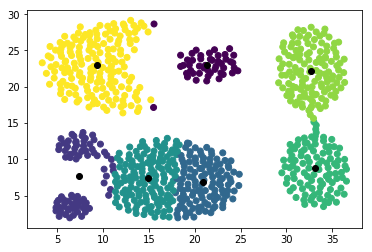

In [5]:
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.scatter(centroids[:,0],centroids[:,1], c = 'black', alpha = 1)

fig size: 72.0 DPI, size in inches [6. 4.]


Traceback (most recent call last):
  File "/Users/davidvankeulen/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/Users/davidvankeulen/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/Users/davidvankeulen/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/Users/davidvankeulen/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1762, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-5-d26adb6289f9>", line 10, in update
    print(label)
NameError: name 'label' is not defined
/Users/davidvankeulen/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("T

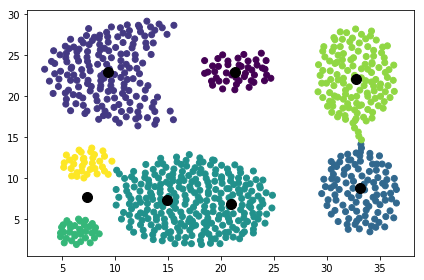

In [5]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

ax.scatter(X[:,0], X[:,1], c = Y)
ax.scatter(centroids[:,0],centroids[:,1], c = 'black', s = 100)

def update(i):
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)

if __name__ == '__main__':
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()